In [1]:
%pylab inline
import sys
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
import thulium_python_lib.image_processing_new as impr
from scipy.optimize import curve_fit
fit_func = impr.gaussian

Populating the interactive namespace from numpy and matplotlib
Done importing, module image_processing now


In [2]:
# res - initial data
res= {'13 cl lat=on a=10db, t=1ms f=417.125': array([[ -7.50000000e-01,   1.47184000e+05],
        [ -6.00000000e-01,   1.50399000e+05],
        [ -4.50000000e-01,   1.50301000e+05],
        [ -3.00000000e-01,   1.33130000e+05],
        [ -1.50000000e-01,   1.13698000e+05],
        [  0.00000000e+00,   1.10529000e+05],
        [  1.50000000e-01,   1.23086000e+05],
        [  3.00000000e-01,   1.38822000e+05],
        [  4.50000000e-01,   1.50726000e+05],
        [  6.00000000e-01,   1.53909000e+05],
        [  7.50000000e-01,   1.55667000e+05]]),
 '23 cl lat=on t=1ms a=15db f=417.125': array([[ -7.50000000e-01,   1.16323000e+05],
        [ -6.00000000e-01,   1.11897000e+05],
        [ -4.50000000e-01,   1.16149000e+05],
        [ -3.00000000e-01,   1.09411000e+05],
        [ -2.00000000e-01,   1.02661000e+05],
        [ -1.50000000e-01,   9.58392000e+04],
        [ -1.00000000e-01,   9.13727000e+04],
        [ -5.00000000e-02,   8.86458000e+04],
        [  0.00000000e+00,   8.75337000e+04],
        [  5.00000000e-02,   9.20273000e+04],
        [  1.00000000e-01,   8.96294000e+04],
        [  1.50000000e-01,   9.50118000e+04],
        [  2.00000000e-01,   1.00146000e+05],
        [  3.00000000e-01,   1.05454000e+05],
        [  4.50000000e-01,   1.11690000e+05],
        [  6.00000000e-01,   1.16027000e+05],
        [  7.50000000e-01,   1.15547000e+05]]),
 '24 cl lat=off t=1ms a=15db f=417.65': array([[ -7.50000000e-01,   1.29601000e+05],
        [ -6.00000000e-01,   1.26565000e+05],
        [ -4.50000000e-01,   1.29106000e+05],
        [ -3.00000000e-01,   1.26820000e+05],
        [ -2.00000000e-01,   1.24091000e+05],
        [ -1.50000000e-01,   1.24814000e+05],
        [ -1.00000000e-01,   1.17369000e+05],
        [ -5.00000000e-02,   1.11657000e+05],
        [  0.00000000e+00,   1.14153000e+05],
        [  5.00000000e-02,   1.18962000e+05],
        [  1.00000000e-01,   1.22901000e+05],
        [  1.50000000e-01,   1.25249000e+05],
        [  2.00000000e-01,   1.27680000e+05],
        [  3.00000000e-01,   1.30628000e+05],
        [  4.50000000e-01,   1.29169000e+05],
        [  6.00000000e-01,   1.33871000e+05],
        [  7.50000000e-01,   1.32691000e+05]]),
 '9 cl lat=on t=20ms a=10db f=417.125': array([[ -7.50000000e-01,   1.49278000e+05],
        [ -6.00000000e-01,   1.48046000e+05],
        [ -4.50000000e-01,   1.41227000e+05],
        [ -3.00000000e-01,   9.55532000e+04],
        [ -1.50000000e-01,   4.79713000e+04],
        [  0.00000000e+00,   3.75233000e+04],
        [  1.50000000e-01,   5.74415000e+04],
        [  3.00000000e-01,   9.28019000e+04],
        [  4.50000000e-01,   1.22209000e+05],
        [  6.00000000e-01,   1.38424000e+05],
        [  7.50000000e-01,   1.44867000e+05]])}

In [3]:
data = {'13 cl lat=on a=10db, t=1ms f=417.125': array([[-0.45      ,  0.94550547],
        [-0.15      ,  0.96615853],
        [ 0.15      ,  0.96552898],
        [ 0.45      ,  0.85522301],
        [ 0.75      ,  0.73039244],
        [ 1.05      ,  0.71003488],
        [ 1.35      ,  0.79070066],
        [ 1.65      ,  0.89178824],
        [ 1.95      ,  0.96825917],
        [ 2.25      ,  0.98870666],
        [ 2.55      ,  1.        ]]),
 '23 cl lat=on t=1ms a=15db f=417.125': array([[-0.45      ,  1.        ],
        [-0.15      ,  0.96195077],
        [ 0.15      ,  0.99850417],
        [ 0.45      ,  0.94057925],
        [ 0.65      ,  0.88255117],
        [ 0.75      ,  0.82390585],
        [ 0.85      ,  0.78550845],
        [ 0.95      ,  0.76206597],
        [ 1.05      ,  0.75250552],
        [ 1.15      ,  0.79113589],
        [ 1.25      ,  0.77052174],
        [ 1.35      ,  0.8167929 ],
        [ 1.45      ,  0.86093034],
        [ 1.65      ,  0.9065619 ],
        [ 1.95      ,  0.96017125],
        [ 2.25      ,  0.99745536],
        [ 2.55      ,  0.99332892]]),
 '24 cl lat=off t=1ms a=15db f=417.65': array([[-1.5       ,  0.96810362],
        [-1.2       ,  0.94542507],
        [-0.9       ,  0.96440603],
        [-0.6       ,  0.94732989],
        [-0.4       ,  0.9269446 ],
        [-0.3       ,  0.93234532],
        [-0.2       ,  0.87673208],
        [-0.1       ,  0.83406414],
        [ 0.        ,  0.85270895],
        [ 0.1       ,  0.88863159],
        [ 0.2       ,  0.91805544],
        [ 0.3       ,  0.93559471],
        [ 0.4       ,  0.95375399],
        [ 0.6       ,  0.97577519],
        [ 0.9       ,  0.96487663],
        [ 1.2       ,  1.        ],
        [ 1.5       ,  0.99118554]]),
 '9 cl lat=on t=20ms a=10db f=417.125': array([[-0.45      ,  1.        ],
        [-0.15      ,  0.99174694],
        [ 0.15      ,  0.94606707],
        [ 0.45      ,  0.64010236],
        [ 0.75      ,  0.32135546],
        [ 1.05      ,  0.25136524],
        [ 1.35      ,  0.38479548],
        [ 1.65      ,  0.62167165],
        [ 1.95      ,  0.81866718],
        [ 2.25      ,  0.92729002],
        [ 2.55      ,  0.9704511 ]])}

24 cl lat=off t=1ms a=15db f=417.65 [-0.06083852 -0.05621604  0.28003549  0.96889274]
23 cl lat=on t=1ms a=15db f=417.125 [-0.21521142  1.07379894  0.52358168  0.98983828]


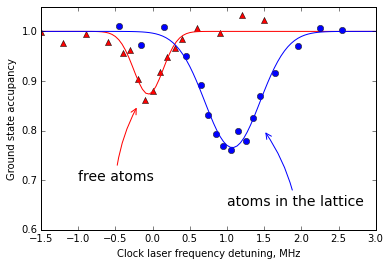

In [24]:
#fig1, ax1 = subplots()
cols = ['r^','bo']
cols2 = ['r','b']
i=0
for key, value in data.items():
    if key == '9 cl lat=on t=20ms a=10db f=417.125' or key == '13 cl lat=on a=10db, t=1ms f=417.125':
        continue
    popt_T, pcov_T = curve_fit(fit_func, value[:,0],value[:,1], p0=(-1, 0, 1, 1))
    plot(value[:,0],value[:,1] / popt_T[-1],cols[i],label=key)
    
    plot(linspace(-1.5,3,100),  1 / popt_T[-1] * fit_func(linspace(-1.5,3,100),*popt_T),cols2[i])
    print(key, popt_T)
    i += 1
#legend(loc=3)
ylim(bottom=0.6)

# for russian version
#xlabel('Отстройка частоты лазера 1,14 мкм, МГц',family="verdana")
#ylabel('Населенность основного состояния',family="verdana")
# annotate('свободные атомы', xy=(-0.2, 0.85), xytext=(-1,0.7),
#            arrowprops=dict(arrowstyle="->", color='r'),family="verdana")
#annotate('оптическая ловушка', xy=(1.5, 0.8), xytext=(1,0.65),
#            arrowprops=dict(arrowstyle="->", color='b'),family="verdana")
#annotate('свободные атомы', xy=(-0.2, 0.85), xytext=(-1,0.7),
#            arrowprops=dict(arrowstyle="->", color='r'),family="verdana")
#annotate('оптическая ловушка', xy=(1.5, 0.8), xytext=(1,0.65),
#            arrowprops=dict(arrowstyle="->", color='b'),family="verdana")

# for english version
xlabel('Clock laser frequency detuning, MHz')
ylabel('Ground state accupancy')

annotate('free atoms', xy=(-0.2, 0.85), xycoords='data',
                xytext=(-1,0.7), size=14, textcoords='data', 
                arrowprops=dict(arrowstyle="->",
                                color='r',
                                connectionstyle="arc3,rad=-0.1"),
                )
annotate('atoms in the lattice', xy=(1.5, 0.8), xycoords='data',
                xytext=(1,0.65), size=14, textcoords='data', 
                arrowprops=dict(arrowstyle="->",
                                color='b',
                                connectionstyle="arc3,rad=0.1"),
                )

#plot(list(zip(*data[key]))[0],list(zip(*data[key]))[1],'g-o')
# savefig('towPlots_eng.png')